On vas s'interesser à décrire le Bat Algorithm 


Définitions : 
Fréquence : le nombre de fois qu'un phénomène périodique se reproduit par unité de temps.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction volcan
def f(x, y):
    return np.exp(-(x**2 + y**2))

# Grille
x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Maximum global
x_star, y_star = 0.0, 0.0
z_star = f(x_star, y_star)

# Plot avec axes
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Grillage
ax.plot_wireframe(X, Y, Z, color='steelblue', linewidth=0.7)

# Point pour le maximum
ax.scatter(
    x_star, y_star, z_star + 0.015,
    color="black", s=25, marker="o", depthshade=False
)

    color="black", s=25, marker="o", depthshade=False
)

# Labels du point
ax.text(
    x_star + 0.1, y_star, z_star + 0.04,
    r"$x^*$", color="black", fontsize=12, weight="bold"
)

ax.text(
    x_star + 0.1, y_star, z_star - 0.04,
    r"$(x_1^*, x_2^*)$", color="black", fontsize=11
)

# Axes
ax.set_xlabel("x₁", labelpad=10)
ax.set_ylabel("x₂", labelpad=10)
ax.set_zlabel("f(x₁, x₂)", labelpad=10)

ax.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()


IndentationError: unexpected indent (3670823566.py, line 32)

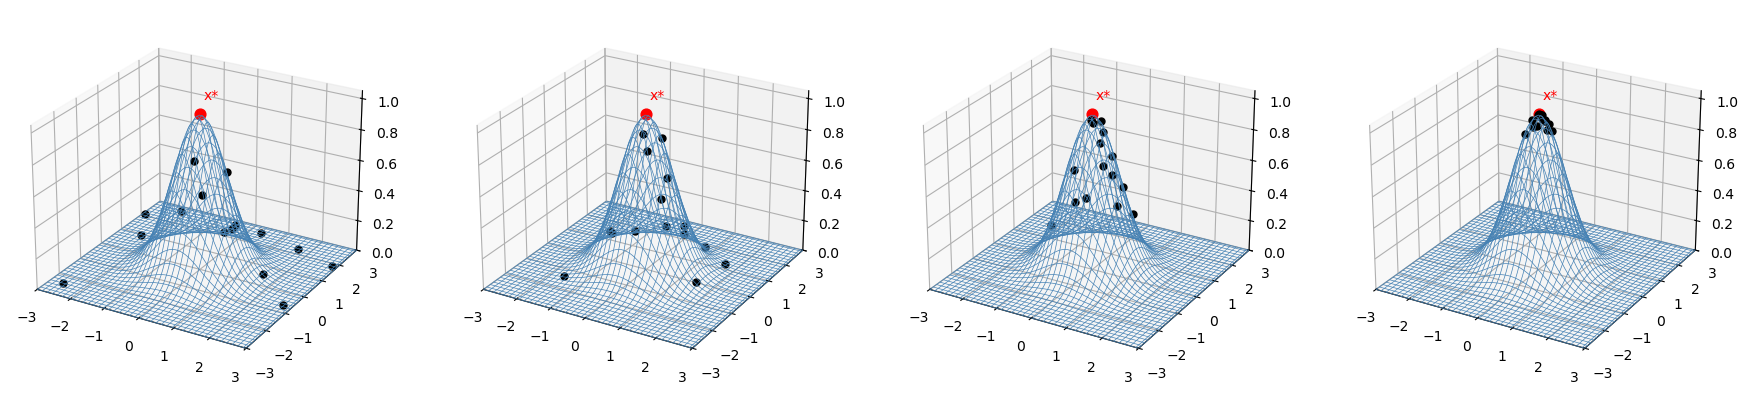

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Fonction volcan ---
def f(x, y):
    return np.exp(-(x**2 + y**2))

# Grille pour la surface
x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# --- Snapshots simulés ---
np.random.seed(0)
snap1 = np.random.uniform(-3, 3, (15, 2))   # initialisation
snap2 = snap1 * 0.6                         # début de montée
snap3 = snap1 * 0.3                         # approche
snap4 = snap1 * 0.1                         # convergence

snapshots = [snap1, snap2, snap3, snap4]

# --- Figure côte à côte ---
fig = plt.figure(figsize=(18, 4))

for i, snap in enumerate(snapshots, 1):

    ax = fig.add_subplot(1, 4, i, projection='3d')

    ax.plot_wireframe(X, Y, Z, color='steelblue', linewidth=0.5)

    # Points (chauves-souris simulées)
    zs = f(snap[:,0], snap[:,1])
    ax.scatter(snap[:,0], snap[:,1], zs + 0.01,
               color="black", s=25, depthshade=False)

    # Maximum global
    ax.scatter(0, 0, f(0,0)+0.01, color="red", s=60)
    ax.text(0.1, 0, f(0,0)+0.1, "x*", color="red", fontsize=10)

    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_zlim(0,1.05)
    ax.view_init(elev=25, azim=-60)

    # Aucun axe
    #ax.set_axis_off()

plt.tight_layout()
plt.show()



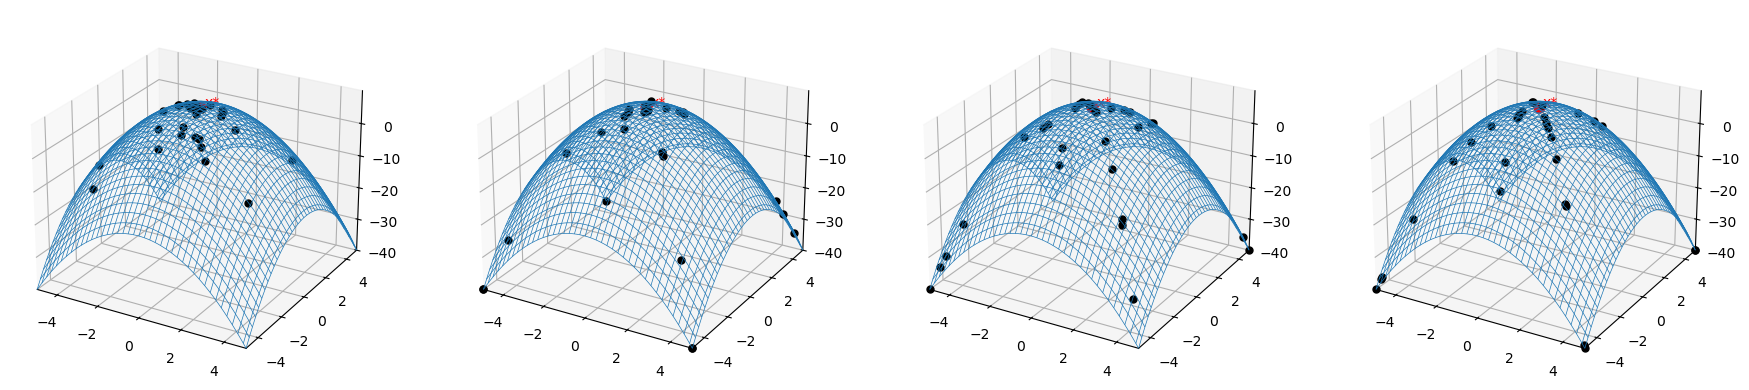

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return 10.0 - (x**2 + y**2)

x = np.linspace(-5, 5, 80)
y = np.linspace(-5, 5, 80)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

filenames = [
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t000.csv",
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t250.csv",
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t500.csv",
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t750.csv",
]

snapshots = [np.loadtxt(fname, delimiter=",") for fname in filenames]

fig = plt.figure(figsize=(18, 4))

for i, snap in enumerate(snapshots, 1):
    ax = fig.add_subplot(1, 4, i, projection='3d')

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(Z.min(), Z.max())

    ax.plot_wireframe(X, Y, Z, linewidth=0.5)

    xs = snap[:, 0]
    ys = snap[:, 1]
    zs = f(xs, ys)

    # --- CHAUVE-SOURIS EN NOIR ---
    ax.scatter(xs, ys, zs + 0.01,
               s=25, depthshade=False, color="black")

    # Maximum global
    ax.scatter(0, 0, f(0,0) + 0.01, s=60, color="red")
    ax.text(0.2, 0, 10.3, "x*", fontsize=10, color="red")

    ax.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()



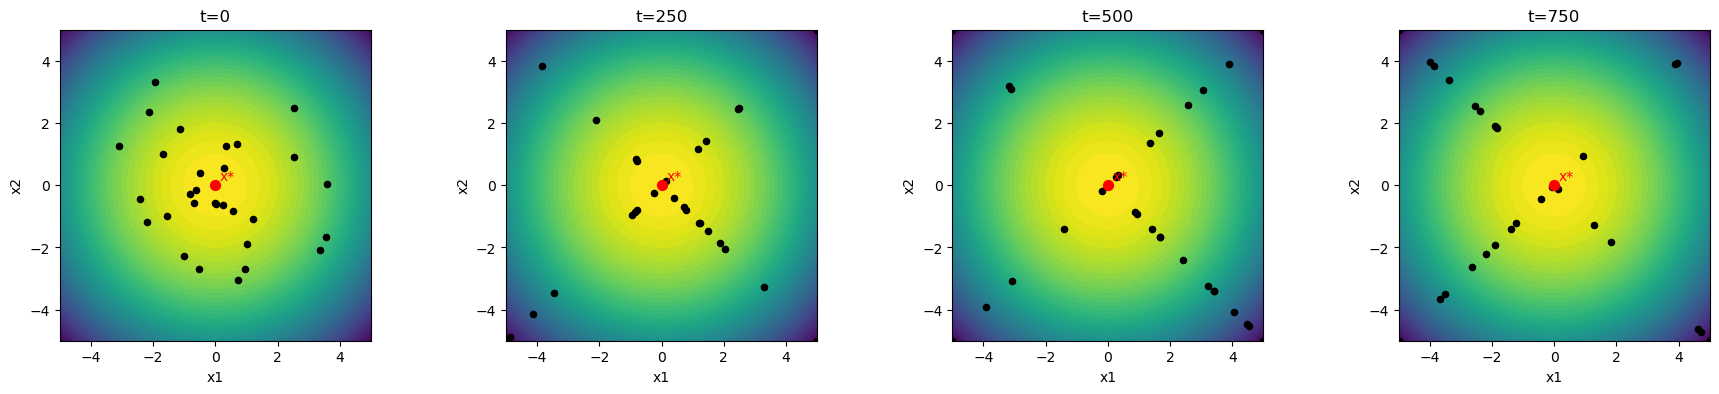

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Même fonction que dans le C ---
def f(x, y):
    return 10.0 - (x**2 + y**2)

# --- Domaine ---
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# --- Snapshots ---
filenames = [
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t000.csv",
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t250.csv",
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t500.csv",
    "/home/benie/Documents/m2/research_project/HPC_project/code/snapshot_t750.csv",
]

snapshots = [np.loadtxt(fname, delimiter=",") for fname in filenames]

# --- Figure ---
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for ax, snap, title in zip(axes, snapshots, ["t=0", "t=250", "t=500", "t=750"]):

    # Heatmap
    im = ax.contourf(X, Y, Z, levels=50, cmap="viridis")

    # Chauves-souris en noir
    ax.scatter(snap[:, 0], snap[:, 1], color="black", s=20)

    # Maximum global
    ax.scatter(0, 0, color="red", s=50)
    ax.text(0.15, 0.15, "x*", color="red", fontsize=10)

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect("equal")

    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

plt.tight_layout()
plt.show()
